# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [34]:
import numpy as np
from glob import glob
import os

# prefix of the images
images_dir = r"F:\datasets\udacity"

# load filenames for human and dog images
human_files = np.array(glob("{0}/lfw/*/*/*".format(images_dir)))
dog_files = np.array(glob("{0}/dogImages/*/*/*".format(images_dir)))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 18982 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


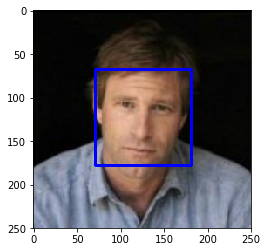

In [35]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [36]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [37]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE: Test the performance of the face_detector algorithm 
def num_human_faces(image_list):
    is_human_face = list(map(face_detector, image_list))
    return np.array(is_human_face).sum()


## on the images in human_files_short and dog_files_short.
print("Number of human faces in human_files_short: {0}".format(num_human_faces(human_files_short)))
print("Number of human faces in dog_files_short: {0}".format(num_human_faces(dog_files_short)))

Number of human faces in human_files_short: 96
Number of human faces in dog_files_short: 18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [38]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [39]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [40]:
from PIL import Image
import torchvision.transforms as transforms

# Transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

img_transform = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize])

def image_preprocess(img_path):
    """
    Process the image so that it can be fed to the pre-trained classifier.
    
    Args:
        img_path: Path of an image.
    Returns:
        image loaded as a tensor.
    """
    image = Image.open(img_path)
    image = img_transform(image).float()
    image.unsqueeze_(0)
    
    if use_cuda:
        image = image.cuda()
    return image

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    predictions = VGG16(image_preprocess(img_path))
    top_class = predictions.argmax().cpu().numpy()
    
    return top_class # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [41]:
### returns "True" if a dog is detected in the image stored at img_path
dog_class = range(151, 269)
def dog_detector(img_path):
    
    top_class = int(VGG16_predict(img_path))  
    return top_class in dog_class # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [42]:
### DONE: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def percent_dogs(image_set):
    dogs_t = np.array(list(map(dog_detector, image_set))).sum()
    dogs_percent = dogs_t * 100.0 / len(image_set)
    return dogs_t, dogs_percent

human_files_dogs_t, human_files_dogs_percent = percent_dogs(human_files_short)
dog_files_dogs_t, dog_files_dogs_percent = percent_dogs(dog_files_short)


print("Percentage of dogs detected in human_files_short: {0}".format(human_files_dogs_percent))
print("Percentage of dogs detected in dog_files_short: {0}".format(dog_files_dogs_percent))

Percentage of dogs detected in human_files_short: 2.0
Percentage of dogs detected in dog_files_short: 91.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [43]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [44]:
import torch
use_cuda = torch.cuda.is_available()

In [45]:
import os
import multiprocessing
import torch
import torchvision.transforms as transforms
from torchvision import datasets

### DONE: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Folders
train_folder = os.path.join(images_dir, r"dogimages\train")
valid_folder = os.path.join(images_dir, r"dogimages\valid")
test_folder = os.path.join(images_dir, r"dogimages\test")

# Batch sizes
min_batch_size = 64
image_input_size = 224
num_workers = np.int(multiprocessing.cpu_count() / 2)

std_normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

# TODO Improve loaders.
img_transforms = {'train': transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
                                     transforms.RandomResizedCrop(image_input_size),
                                     transforms.ToTensor(),
                                     std_normalize]),
                   'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(image_input_size),
                                     transforms.ToTensor(),
                                     std_normalize]),
                   'test': transforms.Compose([transforms.Resize(size=(image_input_size, image_input_size)),
                                     transforms.ToTensor(), 
                                     std_normalize])
                  }

def get_loader(folder, transform, batchsize=min_batch_size, num_workers=num_workers, is_shuffle=True):
    """
    Load dataset based on the folder.
    
    Args:
        folder: Image folder from which to load data.
        transform: Transform to apply to images.
        batchsize: Batchsize for training (default = 128).
        num_workers: Number of workers.
        is_shuffle: True if shuffling of dataset is reauired; False otherwise.
        
    Returns:
        loader variable based on the input.
    """
    img_dataset = datasets.ImageFolder(root=folder, transform=transform)
    loader = torch.utils.data.DataLoader(
        img_dataset,
        batch_size=batchsize,
        num_workers=num_workers,
        shuffle=is_shuffle)
    
    return loader

# Create Loaders
train_loader = get_loader(train_folder, img_transforms['train'])
valid_loader = get_loader(valid_folder, img_transforms['valid'])
test_loader = get_loader(test_folder, img_transforms['test'])
loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### Code to handle the OS error issue. 

This is only run once to remove the images that are giving an OS error.

In [46]:
import os
import sys
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = False

def adjust_image(img_path):
    im = Image.open(img_path) 
    try: 
        im.save(r"c:\temp.jpg") 
    except: 
        print("Corrupt image: ",img_path) 
        ImageFile.LOAD_TRUNCATED_IMAGES = True 
        im.save(img_path) 
        ImageFile.LOAD_TRUNCATED_IMAGES = False
        
def process_truncated_images(folder): 
    # Adjust files that have load problems.
    for root, subdirs, files in os.walk(train_folder):
        for file in os.listdir(root):
            filePath = os.path.join(root, file)
            if os.path.isdir(filePath):
                continue
            adjust_image(filePath)
            
# Process truncated images
# process_truncated_images(train_folder)
# process_truncated_images(valid_folder)
# process_truncated_images(test_folder)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

A random size crop was performed so that a bit of randomness can be injected due to the scaling and it is cropped to the desired input size. The image input size used was 224 x 224 and the main reason for these choices was to follow [this example](https://github.com/pytorch/examples/blob/409a7262dcfa7906a92aeac25ee7d413baa88b67/imagenet/main.py#L94-L95) and I've seen that this size seems to be giving good results across a number of other applications

The augmentation was done using the following operations: random horizontal flip and random rotation

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [47]:
# DEBUG
device = torch.device("cuda:0" if use_cuda else "cpu")
for batch_idx, (data, lbl) in enumerate(train_loader):
    break
if use_cuda:    
    data = data.cuda()
lbl = lbl.to(device)    
print("Data Device: {0}".format(data.device))
print("lbl Device: {0}".format(lbl.device))

Data Device: cuda:0
lbl Device: cuda:0


In [48]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        # Net properties
        self._num_pool_layers = 4
        self._conv_filters = [24, 48, 72, 128]
        
        self.conv1 = nn.Conv2d(3, self._conv_filters[0], 3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(self._conv_filters[0])
    
        self.conv2 = nn.Conv2d(self._conv_filters[0], self._conv_filters[1], 3, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(self._conv_filters[1])
        
        self.conv3 = nn.Conv2d(self._conv_filters[1], self._conv_filters[2], 3, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(self._conv_filters[2])

        self.conv4 = nn.Conv2d(self._conv_filters[2], self._conv_filters[3], 3, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(self._conv_filters[3])
        
        # Max Pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # Image size after passing through pooling layers
        self.downsample_size = np.int(image_input_size / np.power(2, self._num_pool_layers))
        
        # Flatted size
        self._flatten_size = self._conv_filters[self._num_pool_layers - 1] * self.downsample_size * self.downsample_size
        self.fc1 = nn.Linear(self._flatten_size, 1024)
        self.batchnorm_lin1 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.batchnorm_lin2 = nn.BatchNorm1d(1024)
        self.fc3 = nn.Linear(1024, 133)
        
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
                
       # CONVOLUTION LAYERS        
        x = self.pool(F.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(F.relu(self.batchnorm2(self.conv2(x))))
        x = self.pool(F.relu(self.batchnorm3(self.conv3(x))))
        x = self.pool(F.relu(self.batchnorm4(self.conv4(x))))

        # FLATTEN IMAGE
        x = x.view(-1, self._flatten_size)
        
        # LINEAR LAYERS
        x = self.dropout(x)
        x = F.relu(self.batchnorm_lin1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.batchnorm_lin2(self.fc2(x)))
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [49]:
model_scratch

Net(
  (conv1): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(48, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(72, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (batchnorm_lin1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1024, out_features=102

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The main inspiration for the architecture was taken from the [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) paper. While I did not use the same filter banks, I experimented with the size and found this architecture provided satisfactory results. Once I was able to comfortably cross the 10% cut-off, I did not experiment further and moved on to the next steps.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [50]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

#optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [51]:
# DEBUG
# print("CUDA memory allocated: {0}".format(torch.cuda.memory_allocated()))
# print("CUDA memory cached: {0}".format(torch.cuda.memory_cached()))
# torch.cuda.empty_cache()

In [52]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

num_epochs=30

In [53]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    model_best = model
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        train_cnt = 0
        valid_cnt = 0
        prev_valid_loss = 1.0E6 # some high value to get started
        
        ###################
        # train the model #
        ###################
        model.train()
        try:
            for batch_idx, (train_data, train_target) in enumerate(loaders['train']):
                # move to GPU
                if use_cuda:
                    train_data, train_target = train_data.cuda(), train_target.cuda(async=True)
                ## find the loss and update the model parameters accordingly
                ## record the average training loss, using something like
                ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                optimizer.zero_grad()
                output = model(train_data)
                loss = criterion(output, train_target).cuda()
                loss.backward()
                optimizer.step()
                train_loss += loss.item()*train_data.size(0)
                train_cnt += train_data.size(0)

                if (batch_idx % 10 == 0):
                    print("Training batch: {0}".format(batch_idx))
        except OSError:
            print("Train Batch {0} could not be loaded due to an OSError".format(batch_idx))
            pass
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0)
            valid_cnt += data.size(0)

         # calculate average losses
        train_loss = train_loss/train_cnt
        valid_loss = valid_loss/valid_cnt
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss < valid_loss_min):
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


# train the model
model_scratch = train(num_epochs, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Training batch: 0
Training batch: 10
Training batch: 20
Training batch: 30
Training batch: 40
Training batch: 50
Training batch: 60
Training batch: 70
Training batch: 80
Training batch: 90
Training batch: 100
Epoch: 1 	Training Loss: 4.651498 	Validation Loss: 4.332928
Training batch: 0
Training batch: 10
Training batch: 20
Training batch: 30
Training batch: 40
Training batch: 50
Training batch: 60
Training batch: 70
Training batch: 80
Training batch: 90
Training batch: 100
Epoch: 2 	Training Loss: 4.346211 	Validation Loss: 4.130014
Training batch: 0
Training batch: 10
Training batch: 20
Training batch: 30
Training batch: 40
Training batch: 50
Training batch: 60
Training batch: 70
Training batch: 80
Training batch: 90
Training batch: 100
Epoch: 3 	Training Loss: 4.212510 	Validation Loss: 4.098220
Training batch: 0
Training batch: 10
Training batch: 20
Training batch: 30
Training batch: 40
Training batch: 50
Training batch: 60
Training batch: 70
Training batch: 80
Training batch: 90
T

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [54]:
import os
def dog_classes(dir):
    classes = os.listdir(dir)
    classes = [classes[i].split('.')[-1] for i in range(len(classes))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

dog_classes, dog_class_idx = dog_classes(train_folder)

In [55]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    misclassification_map = {}

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        # Add to the misclassification map if you get classification wrong.
        error_vector = 1 - pred.eq(target.data.view_as(pred)).cpu().numpy()
        errors = np.where(error_vector == 1)[0]
        error_labels = [dog_classes[int(target.data[errors[i]].cpu().numpy())] for i in range(len(errors))]
        for error_label in error_labels:
            
            if error_label not in misclassification_map:
                misclassification_map[error_label] = 1
            else:
                misclassification_map[error_label] += 1
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    # Sort the misclassification map by descending order of value.
    misclassification_map = sorted(misclassification_map.items(), key=lambda kv: kv[1], reverse=True)
    return misclassification_map


misclassification_map = test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.034119


Test Accuracy: 26% (225/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [56]:
loaders_transfer = loaders.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [57]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model_transfer.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 133))
                          ]))
    
model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()
    
model_transfer

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

In the final architecture, I started with using DenseNet model as a way of extracting features since it was providing good results on the cat/dog dataset we did in the exercises. 

I replaced the classification layer with two fully connected layer of sizes 1024 and 500 respectively. I primarily started with this architecture since it worked so well in the transfer learning scenario. My plan was to experiment with this if it didn't work well but the results were considerably better than 60% so I didn't look any further. I used a cross entropy loss function and an adam optimizer with a learning rate of 0.001. These values seem to be reasonably well researcher and they seem to be working well. 30 epochs seemed to be enough for getting good accuracy.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [58]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [59]:
# train the model
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Training batch: 0
Training batch: 10
Training batch: 20
Training batch: 30
Training batch: 40
Training batch: 50
Training batch: 60
Training batch: 70
Training batch: 80
Training batch: 90
Training batch: 100
Epoch: 1 	Training Loss: 3.017472 	Validation Loss: 1.103813
Training batch: 0
Training batch: 10
Training batch: 20
Training batch: 30
Training batch: 40
Training batch: 50
Training batch: 60
Training batch: 70
Training batch: 80
Training batch: 90
Training batch: 100
Epoch: 2 	Training Loss: 1.325382 	Validation Loss: 0.692751
Training batch: 0
Training batch: 10
Training batch: 20
Training batch: 30
Training batch: 40
Training batch: 50
Training batch: 60
Training batch: 70
Training batch: 80
Training batch: 90
Training batch: 100
Epoch: 3 	Training Loss: 1.083028 	Validation Loss: 0.573796
Training batch: 0
Training batch: 10
Training batch: 20
Training batch: 30
Training batch: 40
Training batch: 50
Training batch: 60
Training batch: 70
Training batch: 80
Training batch: 90
T

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [60]:
model_transfer_missclassification = test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)
# print("Misclassifications by dog breed: ")
# print(model_transfer_missclassification)

Test Loss: 0.602468


Test Accuracy: 79% (665/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [61]:
### DONE: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    dog_prediction = model_transfer(image_preprocess(img_path))
    dog_idx = int(dog_prediction.argmax().cpu().numpy())
    return dog_classes[dog_idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [62]:
def show_test_image(img_path):
    # display the image
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

In [63]:
def predict_dog_model_transfer(img_path):
    dog_prediction = model_transfer(image_preprocess(img_path))
    dog_idx = int(dog_prediction.argmax().cpu().numpy())
    dog_name = dog_classes[dog_idx].split('.')[-1]
    return dog_name

# Simple test
# img_path = dog_files_short[13]
# predict_dog_model_transfer(img_path)

In [64]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    show_test_image(img_path)
    
    # Detect human
    if (face_detector(img_path)):
        print("Human detected. Human looks like dog breed ...")
        dog_breed = predict_breed_transfer(img_path)
        print(dog_breed)
        return dog_breed
    
    if (dog_detector(img_path)):
        print("Dog breed ...")
        dog_breed = predict_breed_transfer(img_path)
        print(dog_breed)
        return dog_breed
    
    print("Error: Neither dog nor human detected ...")
    return None

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The output is better than I expected for the dog classifications. It is a bit hard to measure the closest dog breed match to the human face. Some improvements to the algorithm are.

1. The algorithm has some challenges when there are multiple humans in the photo. We could improve accuracy of the current face detector by building a deep network for human faces.
2. There is no easy way to validate how good our classification scheme does in detecting the closest dog breed to a human face. We can collect some label data (by asking users) on whether the prediction was approved by humans by juxtaposing a representative image of a dog next to the human. With those lables, we can train a network to do the closest-human-dog match.
3. The top 5 misclassification among dog breeds is as follows:
('Kuvasz', 'English_cocker_spaniel', 'Silky_terrier', 'Doberman_pinscher', 'Lakeland_terrier'). In order to bring down the misclassification rate, we can collect more images on these dogs that are being misclassified for better discrimination.

In [65]:
# Set to true to see true class labels of predictions.
debug_app = False

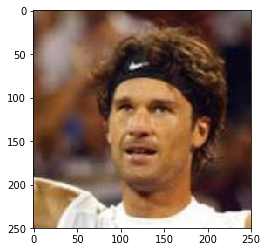

Human detected. Human looks like dog breed ...
Dogue_de_bordeaux


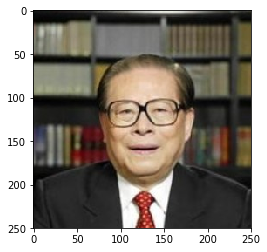

Human detected. Human looks like dog breed ...
Dogue_de_bordeaux


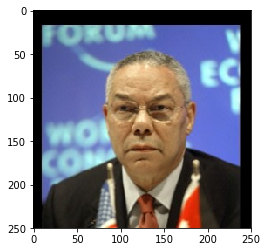

Human detected. Human looks like dog breed ...
Dogue_de_bordeaux


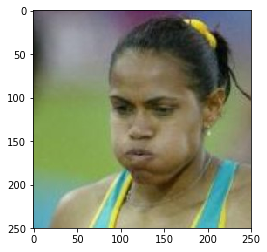

Human detected. Human looks like dog breed ...
Dogue_de_bordeaux


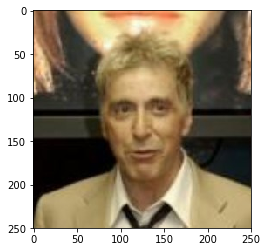

Human detected. Human looks like dog breed ...
Irish_water_spaniel


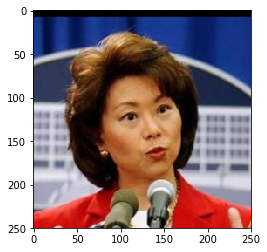

Human detected. Human looks like dog breed ...
Dogue_de_bordeaux


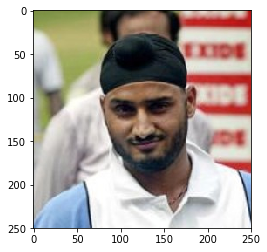

Human detected. Human looks like dog breed ...
Otterhound


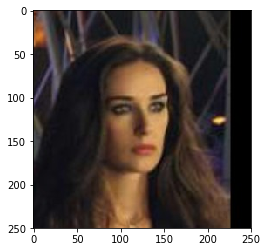

Human detected. Human looks like dog breed ...
Afghan_hound


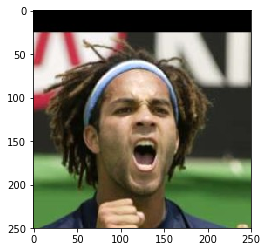

Human detected. Human looks like dog breed ...
Bearded_collie


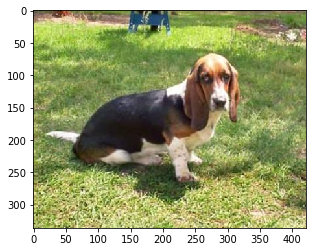

Dog breed ...
American_staffordshire_terrier


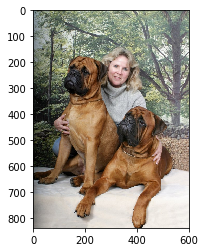

Human detected. Human looks like dog breed ...
Bullmastiff


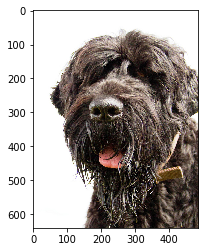

Dog breed ...
Wirehaired_pointing_griffon


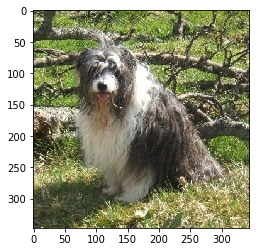

Dog breed ...
Bearded_collie


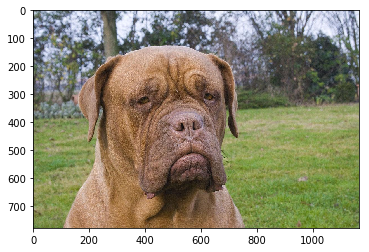

Dog breed ...
Dogue_de_bordeaux


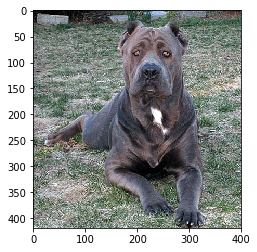

Dog breed ...
Neapolitan_mastiff


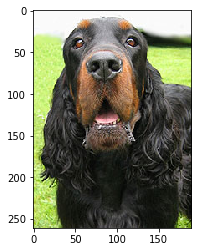

Human detected. Human looks like dog breed ...
Gordon_setter


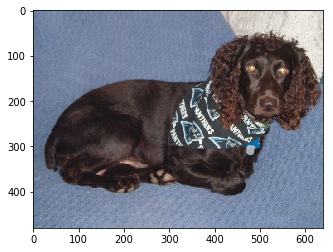

Dog breed ...
Boykin_spaniel


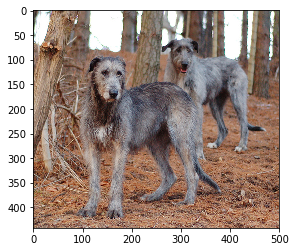

Dog breed ...
Irish_wolfhound


In [66]:
from random import randint
num_test_points = 10
img_idx = [randint(0, 8000) for i in range(0, num_test_points - 1)]
img_idx

fn_path_to_name = lambda x: os.path.split(file)[-1].split('.')[0]

for file in np.hstack((human_files[img_idx], dog_files[img_idx])):
    dog_breed = run_app(file)
    
    if (debug_app):
        print("True class name: {0}".format(fn_path_to_name(file)))